In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('data_train.csv')

In [3]:
data = data.drop(columns='Unnamed: 0')

In [4]:
data['comment'].isna().sum()

0

In [5]:
data['toxic'] = data['toxic'].astype('int')

In [9]:
data['comment'][9]

'Обивку лучше химчистка, душевую кабину силит бенк, пароочиститель убирает застарелый жир, а с известью хуже справляется.\n'

In [7]:
lenghts = [len(comment.split()) for comment in data['comment']]

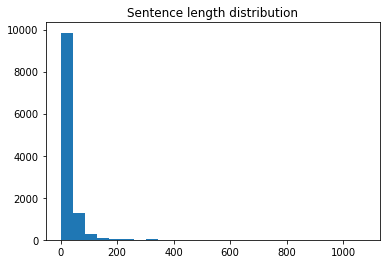

In [8]:
import matplotlib.pyplot as plt

plt.title('Sentence length distribution')
plt.hist(lenghts, bins=25);

In [10]:
print(max(lenghts))
idx = lenghts.index(max(lenghts))
print(data['comment'][idx])

1078
В Киеве на вокзале Мен було рок в 19, коли мене перший раз мав в зад хлопець рок в п д 30. Я тод перш рази став заходити на вокзал Ки в-Пасажирський в туалети - де були каб ни з д рками написи на ст нах. Так як досв ду ще не було н якого, то як знайомиться не уявляв. Сам перший природно не п дходив. А видивлявся на написи. дрочив св й член стоячи в каб нц . Хлопець був у сус дн й каб нц , в н побачив це, хитнув мен головою, запрошуючи п ти з ним. А так як н кого б льше в той момент не було, а був уже веч р, над на щось нше не було -все ж п шов за ним. У мене вже тод з явилася молофья - я вже спускав. Так як трохи ран ше ще не було, при дрочц робив це до при много стану - коли просто ставало дуже добре - але з хуя н чого не вид лялося. А до цього мен вже к лька раз в смоктали член хлопц мужики, я спускав м в рот, знав як це при мно. Ми прийшли б ля вокзалу кудись в кущ . В н розстебнув мен мотню, д став м й член став дрочити. А в той час нав ть це - коли хтось чужий рукою просто вс

In [11]:
data.drop(idx, inplace=True)

In [12]:
import string

def remove_punctuation(text):
    no_punct=[words for words in text if words not in string.punctuation]
    words_wo_punct=''.join(no_punct)
    return words_wo_punct

data['comment']=data['comment'].apply(lambda x: remove_punctuation(x))
data.head()

,comment,toxic
0,дегенератов везде хватает Маркировать бы их ка...,1
1,Почему я не видел в продаже орочьих кружек Охе...,0
2,Напоминает новую машину в минимальной комплект...,0
3,не узнать его ебанутый говор это ещё уметь на...,1
4,Я более субъективно оцениваю и на собственном ...,0


In [13]:
data['comment']=data['comment'].apply(lambda x: x.lower()) 

In [14]:
data.to_csv('dataset.csv', index=False, encoding='utf-16')

In [15]:
data.head()

,comment,toxic
0,дегенератов везде хватает маркировать бы их ка...,1
1,почему я не видел в продаже орочьих кружек охе...,0
2,напоминает новую машину в минимальной комплект...,0
3,не узнать его ебанутый говор это ещё уметь на...,1
4,я более субъективно оцениваю и на собственном ...,0


In [16]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
print(stopwords.words('russian'))


['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впр

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\murad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
stopword = stopwords.words('russian')
def remove_stopwords(text):
    words = text.split()
    ans = ''
    for word in words:
        if word not in stopword:
            ans += word + ' '
    
    return ans

data['comment'] = data['comment'].apply(lambda x: remove_stopwords(x))

In [56]:
data.to_csv('dataset_test.csv', index=False, encoding='utf-16')

In [16]:
data

,comment,toxic
0,дегенератов везде хватает маркировать нибудьчт...,1
1,почему видел продаже орочьих кружек охеренно,0
2,напоминает новую машину минимальной комплектац...,0
3,узнать ебанутый говор это ещё уметь,1
4,субъективно оцениваю собственном опыте могу ск...,0
...,...,...
11668,надеюсь это постирония дваче стало фашистов ра...,1
11669,вообще повезет хотя последнее время рекламы ст...,0
11670,гдето сжигают книги гдето фотографов возможно ...,1
11671,миллионную биткоина,0


In [13]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

def lemmatize(text):
    words = text.split() # разбиваем текст на слова
    res = list()
    for word in words:
        p = morph.parse(word)[0]
        res.append(p.normal_form + ' ')

    return ''.join(res)

data['comment'] = data['comment'].apply(lambda x: lemmatize(x))

In [14]:
data[data['comment'] == ''].index

Int64Index([], dtype='int64')

In [19]:
data.drop(903, inplace=True)

In [15]:
data.to_csv('dataset.csv', index=False, encoding='utf-16')